# LEARN_02_KODILLA_Credit_Card_Defaulter_Prediction


#### The main goal of this project is to analyze the dataset from the KODILLA Credit_Card_Defaulter_Prediction and select a classifier that, after training, will be able to provide the best prediction of credit card fraud.

#### Import of necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#### Loading data from the file default_of_credit_card_clients.xls

In [2]:
dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### VARIABLE DESCRIPTIONS
#### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
#### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
#### X2: Gender (1 = male; 2 = female).
#### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#### X4: Marital status (1 = married; 2 = single; 3 = others).
#### X5: Age (year).
#### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
#### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#### Verification if there are missing data in the dataframe

In [3]:
dataframe.isnull().mean()*100

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

#### Verification if there are duplicates in the dataframe

In [4]:
dataframe.duplicated().any()

False

#### Checking the data type for individual columns

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Preliminary analysis of individual columns
#### At this stage, we can see that the max and min values for the MARRIAGE column and the EDUCTION column take different values than in the description.

In [6]:
dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### To decide on their further processing, first analyze the label structure
#### Labels for "0" and "1" are not well balanced. "1" constitute only about 22% of all data and this will be one of the main challenges for this classification
#### So we should avoid a situation in which the set of labels "1" would be even more reduced, because the models will need this data to work more efficiently

default payment next month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='default payment next month'>

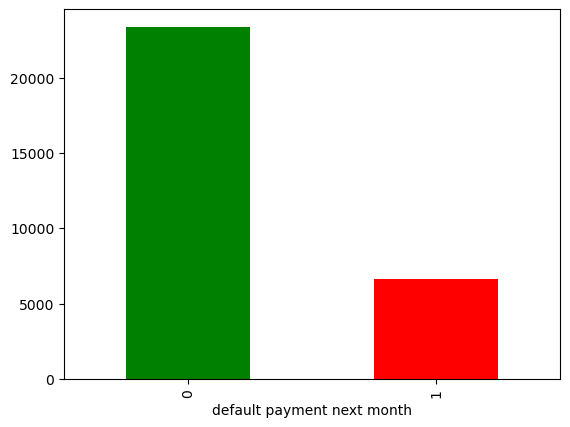

In [7]:
print(dataframe['default payment next month'].value_counts())
CountDefault = pd.Series(dataframe['default payment next month']).value_counts()
CountDefault.plot.bar(color=['green','red'])

#### For the EDUCATION column, 7 groups are visible instead of the defined 4

<Axes: xlabel='EDUCATION'>

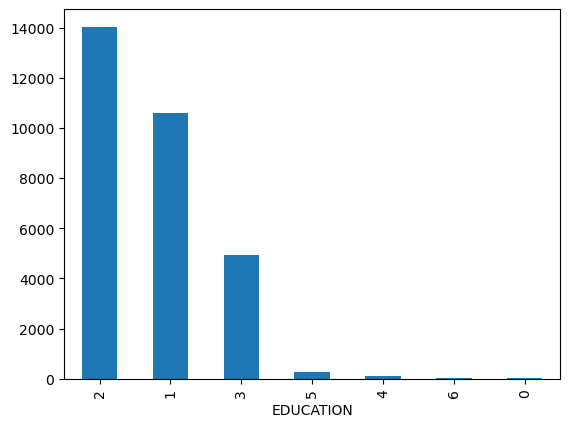

In [8]:
CountEDU = pd.Series(dataframe['EDUCATION']).value_counts()
CountEDU.plot.bar()

#### Thanks to the analysis of the EDUCATION column in terms of the amount of labels 0 and 1, it can be seen that there are labels 1 in additional incorrect groups. Therefore, they will be assigned to the "others" category.

In [9]:
print("All data from Column:", pd.Series(dataframe['EDUCATION']).value_counts())
print("\nOnly labels '0' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==0]['EDUCATION']).value_counts())
print("\nOnly labels '1' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==1]['EDUCATION']).value_counts())

All data from Column: EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Only labels '0' from from Column: EDUCATION
2    10700
1     8549
3     3680
5      262
4      116
6       43
0       14
Name: count, dtype: int64

Only labels '1' from from Column: EDUCATION
2    3330
1    2036
3    1237
5      18
6       8
4       7
Name: count, dtype: int64


#### The situation is similar for the MARRIAGE column, except that we only have one additional category not included in the description. The procedure is analogous to the one above

<Axes: xlabel='MARRIAGE'>

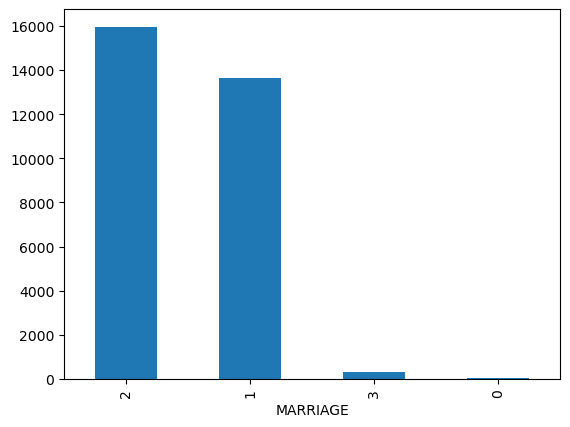

In [10]:
CountMAR = pd.Series(dataframe['MARRIAGE']).value_counts()
CountMAR .plot.bar()

In [11]:
print("All data from Column:", pd.Series(dataframe['MARRIAGE']).value_counts())
print("\nOnly labels '0' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==0]['MARRIAGE']).value_counts())
print("\nOnly labels '1' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==1]['MARRIAGE']).value_counts())

All data from Column: MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Only labels '0' from from Column: MARRIAGE
2    12623
1    10453
3      239
0       49
Name: count, dtype: int64

Only labels '1' from from Column: MARRIAGE
2    3341
1    3206
3      84
0       5
Name: count, dtype: int64


#### For the AGE and LIMIT_BAL columns that contain numeric data, you can visualize it by estimating the density of the distribution for labels 1 and labels 0 on a single graph.
#### The graph below for AGE shows that the density of the distributions is different for labels 0 and 1 depending on age, this can be helpful when evaluating classifiers.

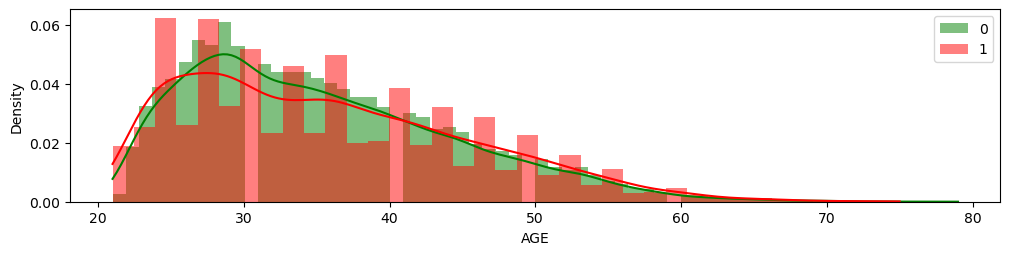

In [12]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'AGE'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'AGE'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

#### Also, based on the credit limit granted, it can be seen that the distribution density is different for labels 1 and 0, especially in the case of lower amounts.

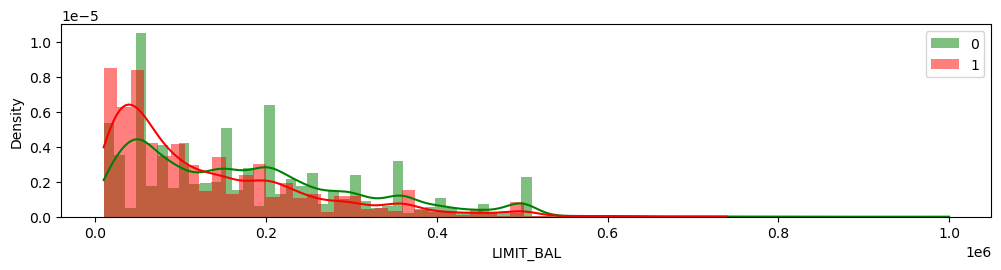

In [13]:
plt.figure(figsize=(12, 2.5))
sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'LIMIT_BAL'], kde=True, stat="density", linewidth=0, color='green', label='0')
sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'LIMIT_BAL'], kde=True, stat="density", linewidth=0, color='red', label='1')
plt.legend(loc='upper right')
plt.show()

#### As a final step in the preliminary analysis, correlation for numerical data will be checked for the possibility of applying PCA.
#### As can be seen in the matrix below, there are strong correlations for the BIL_AMT data and bit lower for PAY.

In [14]:
column_names = dataframe.columns.tolist()
non_corr_features = ['SEX','EDUCATION','MARRIAGE','ID', 'default payment next month']
correlation_data = [num_f for num_f in column_names if num_f not in non_corr_features]

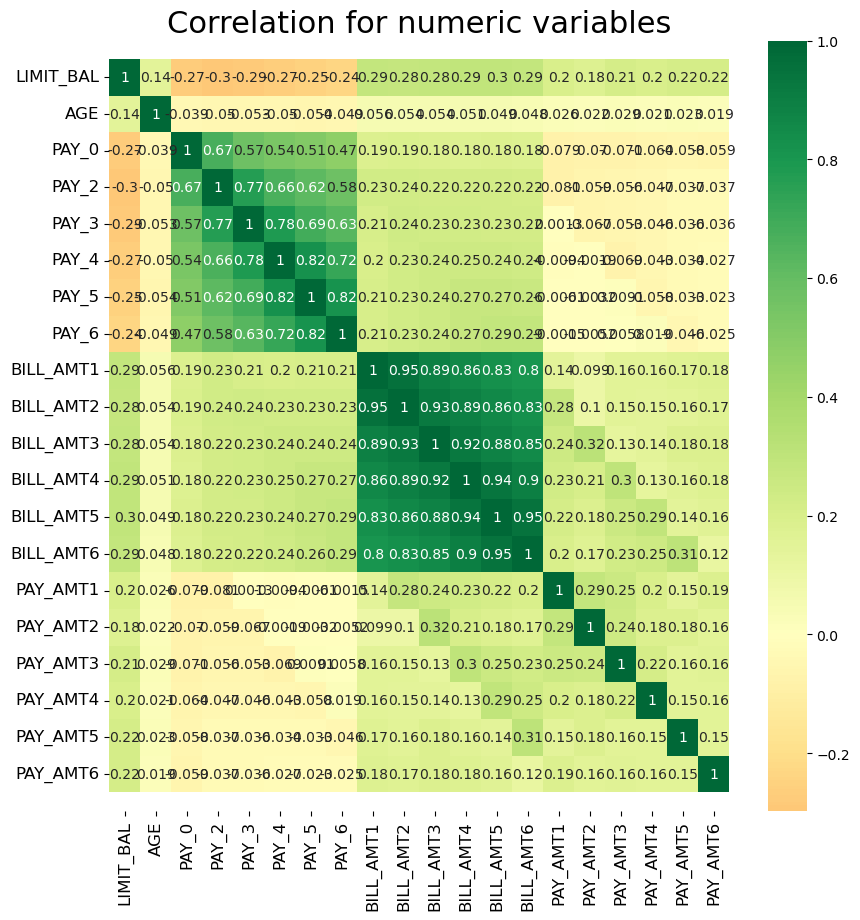

In [15]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dataframe[correlation_data].corr(),
                 xticklabels=dataframe[correlation_data].corr().columns,
                 yticklabels=dataframe[correlation_data].columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Correlation for numeric variables', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### The ID column does not provide any useful information so it is removed

In [16]:
dataframe.drop(['ID'], axis=1, inplace=True)

#### Data are assigned to X and y and split into test (20%) and training sets (80%). Stratification is extremely important in the case of imbalanced classes.

In [17]:
X = dataframe.drop(['default payment next month'], axis=1).copy()
y = dataframe['default payment next month'].copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Two classes are created which will be responsible for modifications in the EDUCATION and MARRIAGE columns in the pipeline, according to the previously performed analysis.

In [19]:
class Filter_Education(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y = None ):
        return self

    def transform(self, X, y = None ):
        X_transformed = X.copy()
        column = self.column
        X_transformed.loc[~X_transformed[column].isin([1, 2, 3, 4]), column] = 4
        return X_transformed

In [20]:
class Filter_Marriage(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y = None ):
        return self

    def transform(self, X, y = None ):
        X_transformed = X.copy()
        column = self.column
        X_transformed.loc[~X_transformed[column].isin([1, 2, 3 ]), column] = 3
        return X_transformed

#### Function definition for displaying results and aggregating them into one table

In [21]:
def result_summary(classifier_name, predict_test, metrics_df, y_test):
    report = classification_report(y_test, predict_test, output_dict=True)
    metrics_df.loc[metrics_df.shape[0]] = [classifier_name,'0',report['0']['precision'],report['0']['recall'],report['0']['f1-score']]
    metrics_df.loc[metrics_df.shape[0]] = [classifier_name,'1',report['1']['precision'],report['1']['recall'],report['1']['f1-score']]
    print(classification_report(y_test, predict_test))
    
    cm = confusion_matrix(y_test, predict_test)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    return metrics_df

#### Defining a function that finds the optimal threshold for neural networks that will allow obtaining the maximum F1 Score for class "1"

In [22]:
def max_treshold(y_pred_prob,  y_test):
    treshold = (np.arange(10, 90, 0.5)/100).tolist()
    max_tr = [0,0]
    for tresh in treshold:
        y_pred = (y_pred_prob > tresh).astype(int)
        report_cl = classification_report(y_test, y_pred, output_dict=True)
        f1 = report_cl['1']['f1-score']
        if f1 > max_tr[1]:
            max_tr = [tresh,f1]
    return max_tr[0]

#### Definition of which data will be treated as numeric and which as categorical (for the use of OneHotEncoder)

In [23]:
column_names = X.columns.tolist()
cat_features = ['SEX','EDUCATION','MARRIAGE']
num_features = [num_f for num_f in column_names if num_f not in cat_features]
metrics_df = pd.DataFrame(columns = ['Classifier', 'Class', 'Precision', 'Recall','F1-score'])

## Model evaluation method.

#### The assumption is that fraud (class 1) is a rare phenomenon, so the right choice of model efficiency in this case is very important. The following are available: precision - informs about the accuracy of predictions for the fraud class, Recall determines the model's ability to detect all cases of the positive class, and F1 Score which is the harmonic mean of Precision and Recall.
#### it was assumed that the priority is to minimize the number of False Negatives, i.e. situations when fraud is not predicted. Such a situation leads to the most painful losses. Recall is crucial because we want to detect as many real frauds as possible. Up to a point, even at the expense of the number of False Positives. It is therefore permissible to sacrifice precision to a certain extent in order to achieve higher recall. However, too low precision will cause customers who are not fraudsters to be treated as fraudsters, so the potential profit that can be achieved thanks to them will be squandered.
#### A good solution for this problem may be F1 Score which is a compromise between Recall and Precision
#### So F1 Score will be used to optimize the models and  monitoring of this indicator as well as Precision and Recall (both for class 1 and 0) is required.

## Selecting the best performing classifiers for binary classification with unbalanced classes

#### Logistic regression - a simple model that allows balancing of imbalanced classes using class_weight
#### SVM - This is a model that will focus on maximizing the margin between classes, which can improve the classification of the minority class. It also has a class_weight parameter that can be used to balance the influence of imbalanced classes.
#### KNN - uses local neighborhood for classification, an imbalanced class will require optimizing the number of neighbors or changing the distance measure
#### Random Forest - due to the possibility of repeated sampling it copes well with small minority datasets. It also has a class_weight parameter for the minority class
#### XGBoost - is an efficient gradient boosting algorithm, naturally resistant to imbalance. The scale_pos_weight parameter can be used to balance classes during training
#### Neural Network - Finally, the neural network will be trained and results will be compered with previous classifiers. To cope with data imbalance the SMOTE method will be used. 

## LogisticRegression Classifier

#### The first classifier that will be used is LogisticRegression. In the first step, a Pipeline is prepared, the purpose of which is to prepare the data for classification, so that gridSeach can also be used. Numeric Data need to be scaled for LogisticRegression and for PCA. This is why StandardScaler() is used two times. All previously defined classes are used. OneHotEncoder is used on all categorical data. Data are not balanced so LogisticRegression will be run with class_weight='balanced' to cover this issue.

In [24]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(class_weight='balanced',  max_iter=10000))])

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'sag', 'preprocessor__numeric_preprocessing__pca__n_components': 0.995}
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.63      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.71      6000



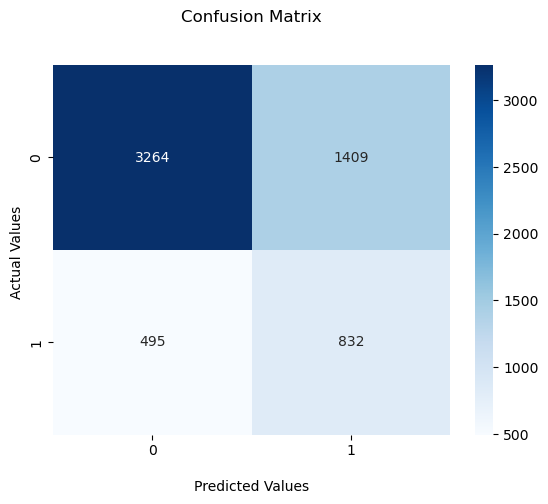

In [25]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.94, 0.96, 0.995],
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2', None],
    'model__solver': ['sag', 'saga']
}

grid_search = GridSearchCV(model_pipeline_v1, 
                           params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring=make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_LogReg = grid_search.best_estimator_
metrics_df = result_summary("LogisticRegression", model_pipeline_LogReg.predict(X_test), metrics_df, y_test)

## SVM Classifier

#### Next classifier that will be used is SVM. In the first step, a Pipeline is prepared, the purpose of which is to prepare the data for classification, so that gridSeach can also be used. Numeric Data need to be scaled for SVM and for PCA. This is why StandardScaler() is used two times. All previously defined classes are used. OneHotEncoder is used on all categorical data. Data are not balanced so SVM will be run with class_weight='balanced' to cover this issue.

In [26]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC(class_weight='balanced', kernel='poly', gamma='scale'))])

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Hyperparameters: {'model__C': 1, 'preprocessor__numeric_preprocessing__pca__n_components': 0.96}
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.55      0.52      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000



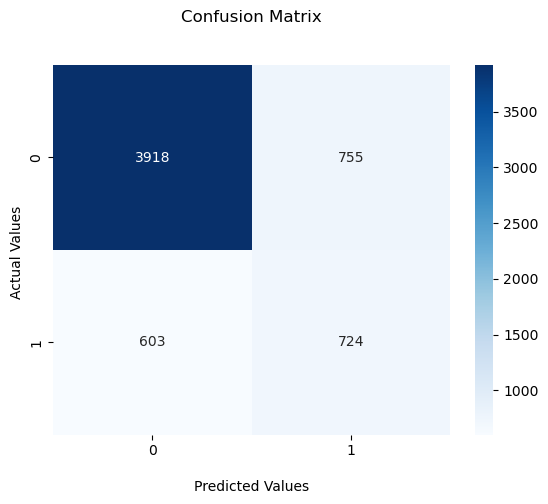

In [27]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.9, 0.96, 0.98],
    'model__C': [0.01, 1, 10]   
}

grid_search = GridSearchCV(model_pipeline_v2, 
                           params, 
                           cv=4, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring = make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_SVM = grid_search.best_estimator_
metrics_df = result_summary("SVM", model_pipeline_SVM.predict(X_test), metrics_df, y_test)

## KNN Classifier 

#### Next classifier that will be used is KNN. In the first step, a Pipeline is prepared, the purpose of which is to prepare the data for classification, so that gridSeach can also be used. Numeric Data need to be scaled for KNN and for PCA. This is why StandardScaler() is used two times. All previously defined classes are used. OneHotEncoder is used on all categorical data. Data are not balanced so KNN will be run with weights='distance' to cover this issue.

In [28]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier(weights='distance'))])

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'model__metric': 'minkowski', 'model__n_neighbors': 15, 'model__weights': 'distance', 'preprocessor__numeric_preprocessing__pca__n_components': 0.96}
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



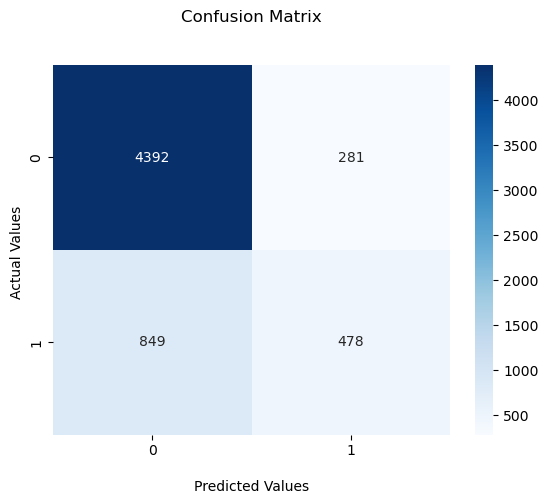

In [29]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.94, 0.96, 0.98],
    'model__n_neighbors': [7, 11, 15, 19, 22, 30], 
    'model__weights': ['uniform', 'distance'],                
    'model__metric': ['minkowski',  'euclidean', 'manhattan']
}

grid_search = GridSearchCV(model_pipeline_v3, 
                           params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring = make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_KNN = grid_search.best_estimator_
metrics_df = result_summary("KNN", model_pipeline_KNN.predict(X_test), metrics_df, y_test)

## Pipeline fo RandomForestClassifier and XGBoost

#### RandomForestClassifier and XGBoost do not need data scaling, so the pipeline will be modified for them. Using one pipeline, the data will be prepared for both classifiers. In this case X_test data need to be transform separately to ensure that the test data is transformed in the same way as the training data.

In [30]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v4 = Pipeline(steps=[('preprocessor', data_preparation)])

X_train_transform = model_pipeline_v4.fit_transform(X_train)
X_test_transform = model_pipeline_v4.transform(X_test)

## Random Forest Classifier

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 95}
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4673
           1       0.52      0.57      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.80      0.79      0.79      6000



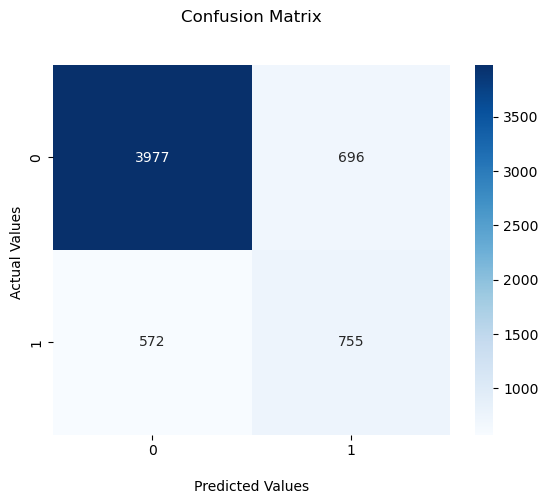

In [31]:
param_grid = {  
    'n_estimators': [50, 95],           
    'max_depth': [None, 5, 10],           
    'min_samples_split': [2, 3, 4],    
    'min_samples_leaf': [1, 3, 4]  
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight= 'balanced'),
    param_grid=param_grid,
    scoring= make_scorer(f1_score, pos_label=1),
    cv=5,
    verbose=2,
    n_jobs=-1
) 

grid_search.fit(X_train_transform, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_RFC = grid_search.best_estimator_
metrics_df = result_summary("Random Forest", model_pipeline_RFC.predict(X_test_transform), metrics_df, y_test)

## XGBoost Classifier

#### GridSearch finds the best parameters for training the model to optimize the F1 Score for class 1. Once found, the model is saved to a variable and result_summary function is called that will display the results and save them to a table.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 95, 'scale_pos_weight': 3.5, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      4673
           1       0.48      0.61      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



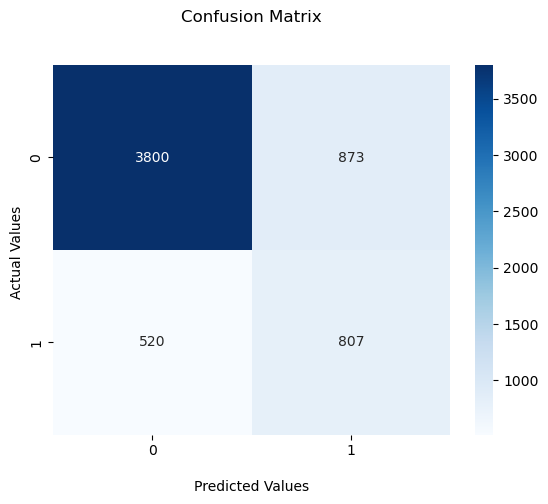

In [32]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.1 ], 
    'scale_pos_weight': [2, 3.5, 4, 5 ],
    'n_estimators': [50, 95 ],           
    'max_depth': [ 3, 4, 5 ],           
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8] 
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic'),
    param_grid=param_grid,
    scoring= make_scorer(f1_score, pos_label=1),
    cv=5, 
    verbose=2,
    n_jobs=-1
) 

grid_search.fit(X_train_transform, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_XGB = grid_search.best_estimator_
metrics_df = result_summary("XGBoost", model_pipeline_XGB.predict(X_test_transform), metrics_df, y_test)

## Neural Network

#### Neural Network need data scaling, so the pipeline will be modified appropriately. In this case X_test data need to be transform separately to ensure that the test data is transformed in the same way as the training data.

In [33]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v5 = Pipeline(steps=[('preprocessor', data_preparation)])

X_train_transform = model_pipeline_v5.fit_transform(X_train)
X_test_transform = model_pipeline_v5.transform(X_test)

#### Neural Network work better when the data are balanced. Actual unbalance can be check again.

In [34]:
y_train.value_counts(normalize=True)

default payment next month
0    0.778792
1    0.221208
Name: proportion, dtype: float64

#### To avoid issues with not balanced classes the SMOTE method will be used

In [35]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transform, y_train)
y_train_resampled.value_counts(normalize=True)

default payment next month
0    0.5
1    0.5
Name: proportion, dtype: float64

#### For Neutral Network the model is defined  with 4 Dense layers and 3 Droput layers (to avoid overfitting). Activation method for Dense Layer will be 'relu'. Last Dense layer will be 'sigmoid'. To compile model as optimizer Adam is chosen with learning rate = 0.001. Loss will be defined as binary_crossentropy due to binary classification. Observed metrics will be 'Precision', 'Recall'. Model is trained for 50 epochs, batch size=32 (it will make learning process longer). Validation split is set to 25%. For model taining the data after SMOTE resampling are used. 

In [36]:
model = Sequential([
    tf.keras.Input(shape=(X_train_resampled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['Precision', 'Recall'])

history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.25, verbose=2)

Epoch 1/50
877/877 - 3s - 3ms/step - Precision: 0.7026 - Recall: 0.4132 - loss: 0.5638 - val_Precision: 1.0000 - val_Recall: 0.4859 - val_loss: 0.8831
Epoch 2/50
877/877 - 1s - 1ms/step - Precision: 0.7134 - Recall: 0.4539 - loss: 0.5358 - val_Precision: 1.0000 - val_Recall: 0.4742 - val_loss: 0.8290
Epoch 3/50
877/877 - 1s - 1ms/step - Precision: 0.7180 - Recall: 0.4601 - loss: 0.5302 - val_Precision: 1.0000 - val_Recall: 0.4458 - val_loss: 0.8948
Epoch 4/50
877/877 - 1s - 1ms/step - Precision: 0.7102 - Recall: 0.4721 - loss: 0.5263 - val_Precision: 1.0000 - val_Recall: 0.4744 - val_loss: 0.8252
Epoch 5/50
877/877 - 1s - 1ms/step - Precision: 0.7135 - Recall: 0.4720 - loss: 0.5213 - val_Precision: 1.0000 - val_Recall: 0.4811 - val_loss: 0.8893
Epoch 6/50
877/877 - 1s - 1ms/step - Precision: 0.7126 - Recall: 0.4784 - loss: 0.5193 - val_Precision: 1.0000 - val_Recall: 0.5251 - val_loss: 0.8609
Epoch 7/50
877/877 - 1s - 1ms/step - Precision: 0.7118 - Recall: 0.4853 - loss: 0.5183 - val_P

#### For the trained model and test data, the optimal threshold was checked to maximize the result

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.49      0.57      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



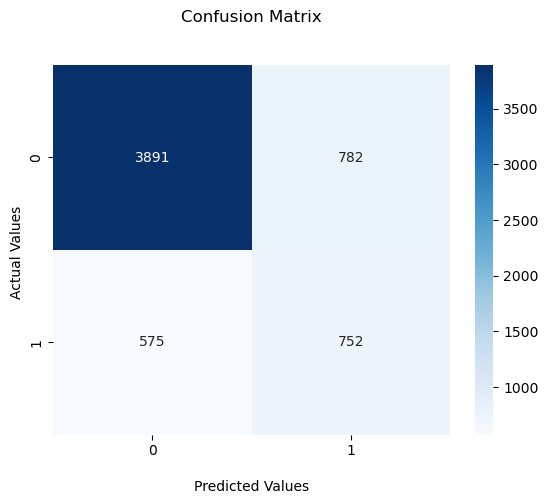

In [37]:
y_pred_prob = model.predict(X_test_transform)
max_tresh = max_treshold(y_pred_prob,  y_test)
y_pred = (y_pred_prob > max_tresh).astype(int)
metrics_df = result_summary("Neural Network", y_pred, metrics_df, y_test)

## SUMMARY

In [38]:
metrics_df.style.hide(axis="index")

Classifier,Class,Precision,Recall,F1-score
LogisticRegression,0,0.868316,0.698481,0.774194
LogisticRegression,1,0.371263,0.626978,0.466368
SVM,0,0.866622,0.838434,0.852295
SVM,1,0.489520,0.545592,0.516037
KNN,0,0.838008,0.939867,0.886020
KNN,1,0.629776,0.360211,0.458293
Random Forest,0,0.874258,0.851059,0.862503
Random Forest,1,0.520331,0.568953,0.543557
XGBoost,0,0.879630,0.813182,0.845102
XGBoost,1,0.480357,0.608139,0.536748


#### The best Recall value (for class 1) was achieved by the LogisticRegression model, unfortunately this was achieved by sacrificing precision, i.e. False Positive classification. On the other hand, the XGBoost model achieved a very similar result in terms of Recall, but with a much better Precision. At this point, it would be necessary to consider what benefits and consequences are associated with not detecting fraud or classifying False positive and choose the appropriate classifier based on this. Random Forest also offers us a fairly good solution, because F1Score has the highest value for it and although Recall is not as high as for XGBoost, the precision value is higher. So if the potential effects of not detecting fraud and False Positive classification were similar, this classifier would be the best option. The KNN classifier did the opposite of Logistic regression, i.e. increased precision at the expense of Recall and thus achieved the maximum F1Score result, but such an option is unlikely to be interesting as a solution to this problem. It is also worth mentioning that KNN for class 0 obtained the highest F1Score and the highest Recall, which means that it is the best classified to predict customers who do not commit credit card fraud. Neural Networks obtained a fairly good result, but slightly worse than Random Forest.

## Next steps
#### To correctly select a model, it would be necessary to determine the consequences of not detecting fraud or qualifying as a False Positive, and based on that information, a decision could be made.
#### Providing more data from fraud operations (category 1) would help to better balance the data and better train the models.